In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt
from scipy.optimize import minimize

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, Holt
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

File 1 added
File 2 added
File 3 added
File 4 added
File 5 added
File 6 added
File 7 added


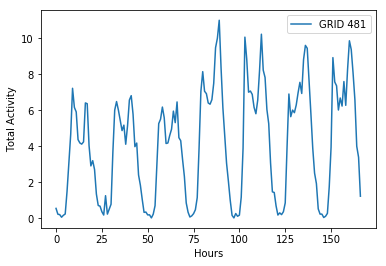

In [18]:
df = pd.DataFrame({})
path = '/media/mayur/Softwares/BE_Project_Grp30/Processed dataset full/'
for i in range(1,8):
    if i<10:
        df_new = pd.read_csv(path+'sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['activity_date'])
    else:
        df_new = pd.read_csv(path+'sms-call-internet-mi-2013-11-{}.csv'.format(i), parse_dates=['activity_date'])
    df = df.append(df_new)
    print("File " + str(i) + " added")
    
df['activity_hour'] += 24*(df.activity_date.dt.day-1)

ax = df[df.square_id==481].plot(x='activity_hour', y='total_activity', label='GRID 481')
plt.xlabel("Hours")
plt.ylabel("Total Activity")
plt.show()

In [20]:
series = df[df['square_id']==147]
series.set_index('activity_hour', inplace=True) 
series.drop(['square_id', 'activity_date'], axis=1, inplace=True)

#print(len(series))  #695
#print(series)
train = series[:125]
test = series[125:]
#train = series[:520]
#test = series[520:]

print(train.head())
print(test.head())

               total_activity
activity_hour                
0.0                 15.760494
1.0                 12.967936
2.0                  5.412327
3.0                  4.908972
4.0                  4.122123
               total_activity
activity_hour                
125.0               11.213219
126.0               70.922871
127.0              132.669026
128.0              154.174371
129.0              107.239388


In [13]:
# Train - Test Plot
'''
ax = train.plot(x='activity_hour', y='total_activity', label='Train')
test.plot(ax=ax, x='activity_hour', y='total_activity', label='Test')
plt.xlabel('Hours')
plt.ylabel('Total_activity')
plt.show()
'''

"\nax = train.plot(x='activity_hour', y='total_activity', label='Train')\ntest.plot(ax=ax, x='activity_hour', y='total_activity', label='Test')\nplt.xlabel('Hours')\nplt.ylabel('Total_activity')\nplt.show()\n"

In [14]:
# Find seasonal components (errors to be removed)

#sm.tsa.seasonal_decompose(train.total_activity).plot()
result = sm.tsa.stattools.adfuller(train.total_activity)
plt.show()

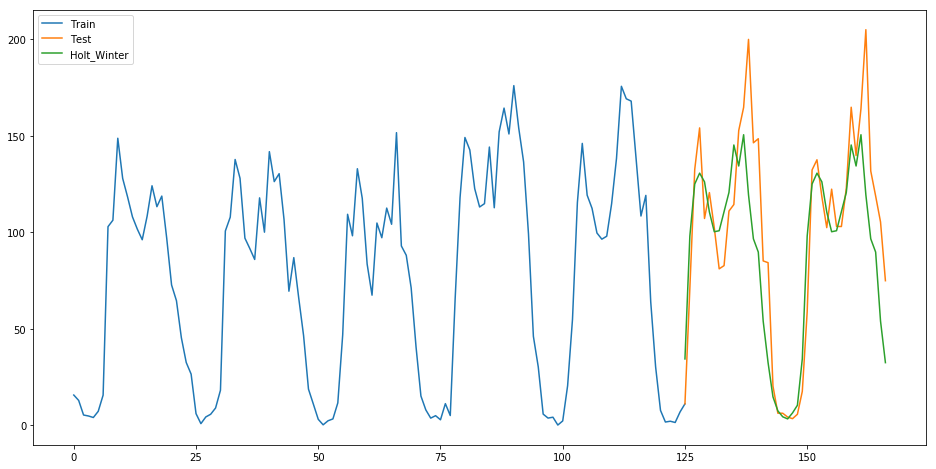

In [21]:
# predict the data
forecast = test.copy()
model = ExponentialSmoothing(np.asarray(train['total_activity']) ,seasonal_periods=24 ,trend='add', seasonal='add',).fit()
forecast['Holt_Winter'] = model.forecast(len(test))

# plot the data
plt.figure(figsize=(16,8))
plt.plot( train['total_activity'], label='Train')
plt.plot(test['total_activity'], label='Test')
plt.plot(forecast['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [23]:
#Calculate errors
rmse = sqrt(mean_squared_error(test.total_activity, forecast.Holt_Winter))
mse = abs((forecast.Holt_Winter - test.total_activity))/test.total_activity
mean_error = np.mean(mse)
accuracy = (1-mean_error)*100
below30 = mse[mse<0.3].count()
all = mse.count()

print("rmse : ", error)
print("mean_error : ", mean_error*100)
print("accuracy : ", accuracy)
print("below30 : ",below30)
print("all : ",all)

rmse :  30.189591802950876
mean_error :  31.455754052536804
accuracy :  68.5442459474632
below30 :  27
all :  42
